In [ ]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock information 
df=web.DataReader('Goog', data_source='yahoo', start='2003-01-01', end='2020-11-13')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086
...,...,...,...,...,...,...
2020-11-09,1818.060059,1760.020020,1790.900024,1763.000000,2268300.0,1763.000000
2020-11-10,1763.000000,1717.300049,1731.089966,1740.390015,2636100.0,1740.390015
2020-11-11,1764.219971,1747.364990,1750.000000,1752.709961,1264000.0,1752.709961


In [18]:
df.shape

(4090, 6)

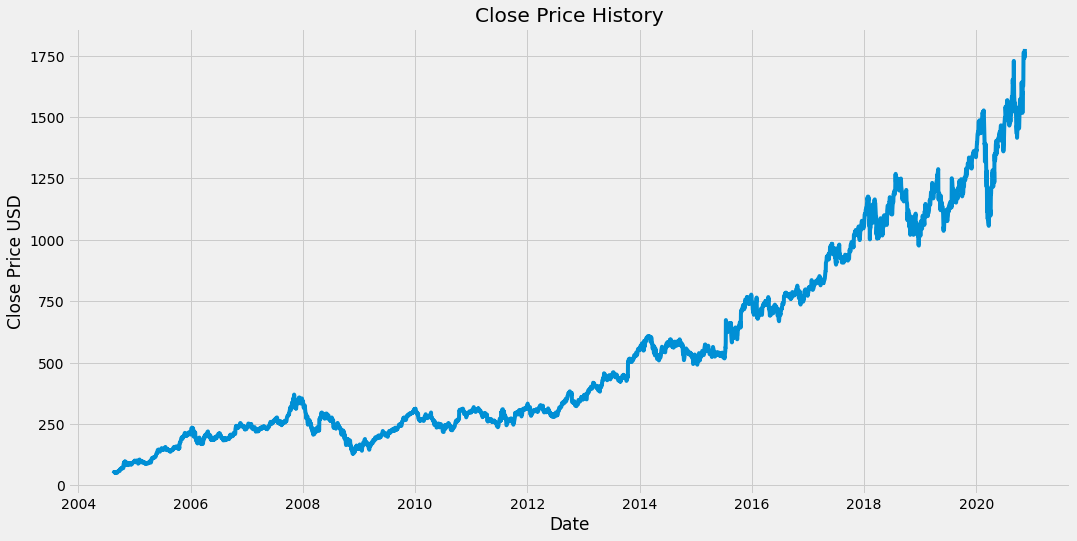

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=17)
plt.ylabel('Close Price USD', fontsize=17)
plt.show()

In [27]:
#Create new dataframe with the close column 
data=df.filter(['Close'])
#Convert data to a numpy array
dataset=data.values
#Get the number of rows to train the model 
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

3272

In [35]:
#Scale the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[9.51751867e-05],
       [2.39375765e-03],
       [2.70811869e-03],
       ...,
       [9.85925177e-01],
       [9.84263533e-01],
       [1.00000000e+00]])

In [34]:
#Creating scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split data into x_train and y_train data set 
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([9.51751867e-05, 2.39375765e-03, 2.70811869e-03, 1.40164583e-03,
       1.72754460e-03, 2.27839586e-03, 1.77080444e-03, 5.76808940e-04,
       6.80635212e-04, 6.92175145e-05, 4.32607257e-04, 0.00000000e+00,
       4.52796067e-04, 6.60446402e-04, 6.63330833e-04, 1.53431200e-03,
       2.16015185e-03, 3.31088530e-03, 3.45797142e-03, 4.02612927e-03,
       5.04131212e-03, 5.58063008e-03, 5.14225396e-03, 5.29799337e-03,
       6.00169961e-03, 5.71617847e-03, 5.26338461e-03, 7.74366416e-03,
       8.96073069e-03, 8.53389230e-03, 9.39333795e-03, 1.01085797e-02,
       1.10631983e-02, 1.06911597e-02, 1.12016334e-02, 1.08786212e-02,
       1.01662595e-02, 1.07834483e-02, 1.17928623e-02, 1.21101099e-02,
       1.27186410e-02, 1.41750844e-02, 1.38232324e-02, 1.16746182e-02,
       1.42385330e-02, 2.08862591e-02, 2.52036740e-02, 2.35886089e-02,
       2.47912577e-02, 2.69052631e-02, 2.61381060e-02, 2.76926068e-02,
       2.73580570e-02, 2.64351627e-02, 2.44249836e-02, 1.99979736e-02,
     

In [37]:
#convert the x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [39]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3212, 60, 1)

In [44]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

3212/3212 [==============================] - 77s 24ms/step - loss: 3.3136e-04


In [47]:
#create a testing dataset
#Create a new array containing scaled values 
test_data=scaled_data[training_data_len-60:,:]
#create a dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [60]:
#convert the data to a numpy array
x_test=np.array(x_test)
#Reshape the data(Currently it is 2 dimentional and LSTM model requires three dimentions)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [61]:
#get the models predicted price values 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [54]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.3444694388466534

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


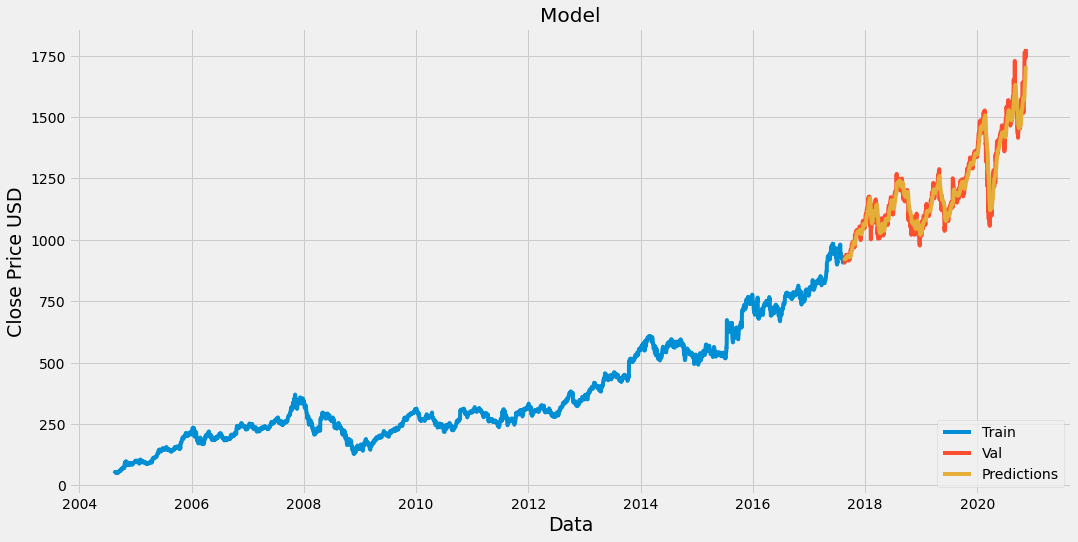

In [57]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=19)
plt.ylabel('Close Price USD', fontsize=19)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [67]:
x_test=scaler.inverse_transform(x_test)

ValueError: ignored